In [1]:
#Problem 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
warnings.filterwarnings('ignore')

In [2]:
df = load_breast_cancer()
df_data = df.data

df_input = pd.DataFrame(df_data)
df_labels = df.target 

labels = np.reshape(df_labels,(569,1)) 
final_df_data = np.concatenate([df_data,labels],axis=1) 
final_df_data.shape 

df_dataset = pd.DataFrame(final_df_data) 
features = df.feature_names 

features_labels = np.append(features,'label') 
df_dataset.columns = features_labels 
# df_dataset['label'].replace(0, 'Benign',inplace=True) 
# df_dataset['label'].replace(1, 'Malignant',inplace=True) 
df = df_dataset
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
y = df.pop('label')
x = df.copy()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = .8, test_size = .2)

In [5]:
scaler = StandardScaler()
x_Newtrain = scaler.fit_transform(x_train)
x_Newtest = scaler.fit_transform(x_test)

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        45
         1.0       0.96      1.00      0.98        69

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Text(0.5, 257.44, 'Predicted label')

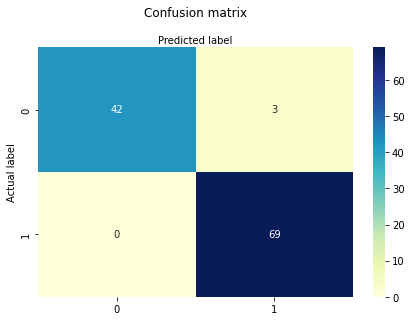

In [6]:
#Part 1.
clf = LogisticRegression(solver='liblinear')
clf.fit(x_Newtrain,y_train)

predicted = clf.predict(x_Newtest)
matrix = confusion_matrix(y_test,predicted)
report = classification_report(y_test,predicted)
print(report)

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu",fmt ='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93        45
         1.0       0.93      0.99      0.96        69

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Text(0.5, 257.44, 'Predicted label')

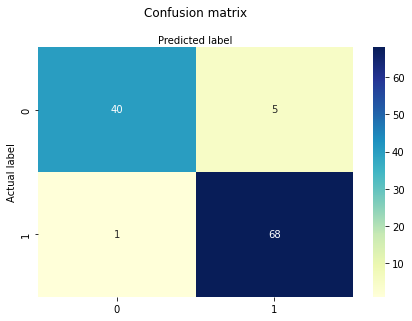

In [7]:
# Part 2. with penalty
c = 5

clf = LogisticRegression(penalty ='l1', C=c, solver='liblinear')
clf.fit(x_Newtrain,y_train)

predicted = clf.predict(x_Newtest)
matrix = confusion_matrix(y_test,predicted)
report = classification_report(y_test,predicted)
print(report)

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu",fmt ='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')